In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Step 1: Read the Excel file
excel_path = '/content/1730285881-Airbnb_Open_Data.xlsx'
df = pd.read_excel(excel_path)

# Step 2: Save it as a CSV file
csv_path = '/content/airbnb_data.csv'
df.to_csv(csv_path, index=False)

print(f"CSV file saved to: {csv_path}")


CSV file saved to: /content/airbnb_data.csv


In [9]:
df = pd.read_csv('/content/airbnb_data.csv', low_memory=False)


In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [12]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [13]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [16]:

# STEP 1: Load the CSV file
df = pd.read_csv('/content/airbnb_data.csv', low_memory=False)

# STEP 2: Drop duplicate rows
df.drop_duplicates(inplace=True)

# STEP 3: Drop 'house_rules' and 'license' columns if they exist
columns_to_drop = ['house_rules', 'license']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# STEP 4: Clean 'price' and 'service fee' columns (remove $ and commas)
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# STEP 5: Rename columns to include dollar sign
df.rename(columns={
    'price': 'price $',
    'service fee': 'service_fee $'
}, inplace=True)

# STEP 6: Drop rows with any missing values
df.dropna(inplace=True)

# STEP 7: Convert column data types (with safety checks)

# Convert price and service fee to float
if 'price $' in df.columns:
    df['price $'] = df['price $'].astype(float)

if 'service_fee $' in df.columns:
    df['service_fee $'] = df['service_fee $'].astype(float)

# Convert 'id' and 'host id' to string
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

# Convert 'last review' to datetime
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Normalize column names to lowercase for easy checking
df.columns = df.columns.str.strip().str.lower()

# Convert 'construction year' to integer if it exists
if 'construction year' in df.columns:
    df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce').astype('Int64')
    df.dropna(subset=['construction year'], inplace=True)
else:
    print("⚠️ Column 'construction year' not found. Skipping conversion.")

# ✅ Final check
print("✔️ Cleaning complete. Here's a summary:")
print(df.info())
print(df.head())


✔️ Cleaning complete. Here's a summary:
<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  object        
 1   name                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83

In [17]:
df.duplicated().value_counts()

,count
False,83390


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  object        
 1   name                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object        
 11  instan

In [19]:
df.describe()

,lat,long,instant_bookable,construction year,price $,service_fee $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83390.000000,83390.000000,83390.000000,83390.0,83390.000000,83390.000000,83390.000000,83390.000000,83390,83390.000000,83390.000000,83390.000000,83390.000000
mean,40.727350,-73.948502,0.497710,2012.487768,626.216381,125.244454,7.406056,32.263701,2019-06-08 21:32:57.647199744,1.377374,3.278714,7.032822,141.788764
min,40.504560,-74.249840,0.000000,2003.0,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687643,-73.982110,0.000000,2007.0,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721325,-73.953710,0.000000,2012.0,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930802,1.000000,2017.0,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.0,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056327,0.050342,0.499998,5.760504,331.807116,66.364942,28.105398,51.958583,NaN,1.751092,1.283684,29.555288,133.937411


In [20]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44162
Private room,37474
Shared room,1646
Hotel room,108


from matplotlib import pyplot as plt
property_types['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
property_types['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

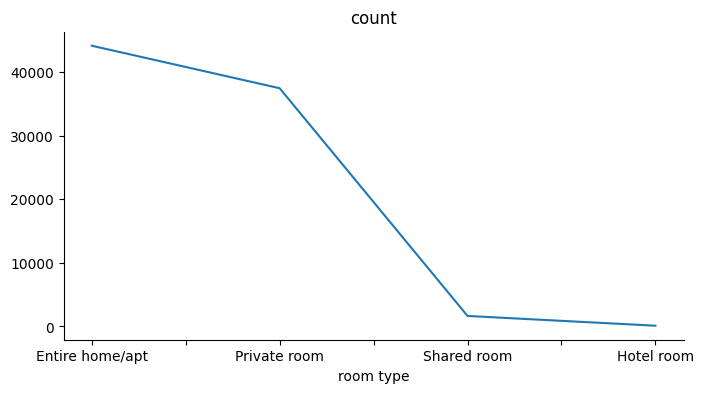

In [21]:
from matplotlib import pyplot as plt
property_types['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

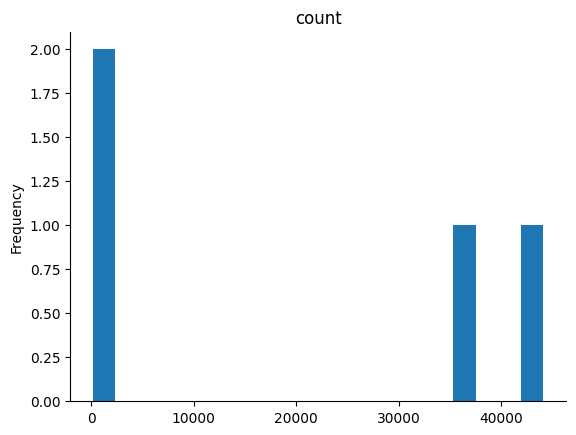

In [22]:
from matplotlib import pyplot as plt
property_types['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

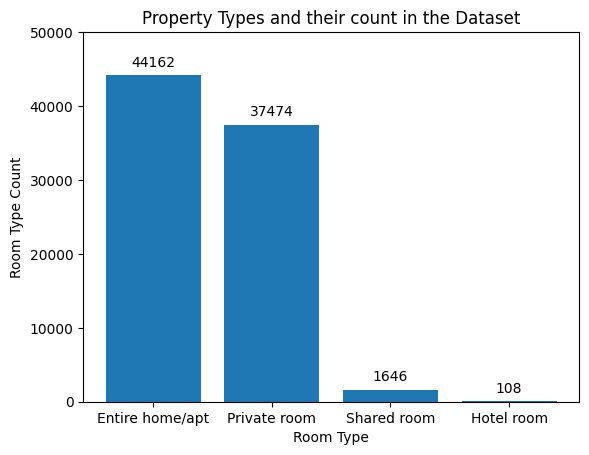

In [25]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [26]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34621
Manhattan,34561
Queens,11124
Bronx,2267
Staten Island,816
brookln,1


from matplotlib import pyplot as plt
hood_group['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hood_group['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

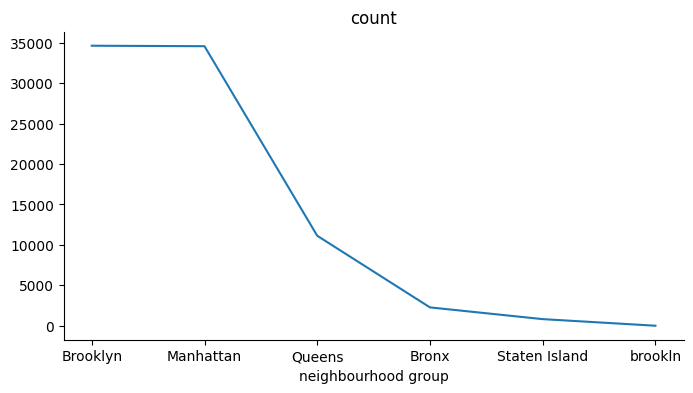

In [27]:
from matplotlib import pyplot as plt
hood_group['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

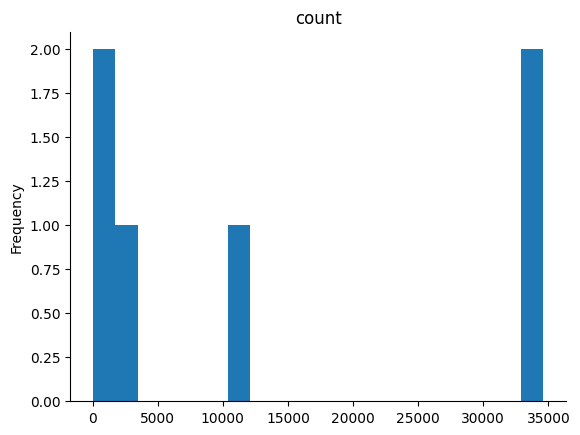

In [28]:
from matplotlib import pyplot as plt
hood_group['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

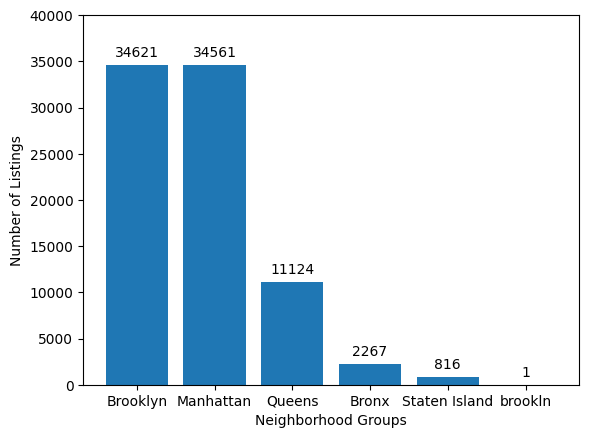

In [29]:
#which neighborhood group has the highest number of listings?

hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);

plt.bar_label (hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4);

plt.ylim([0,40000]);

plt.xlabel('Neighborhood Groups');

plt.ylabel('Number of Listings');

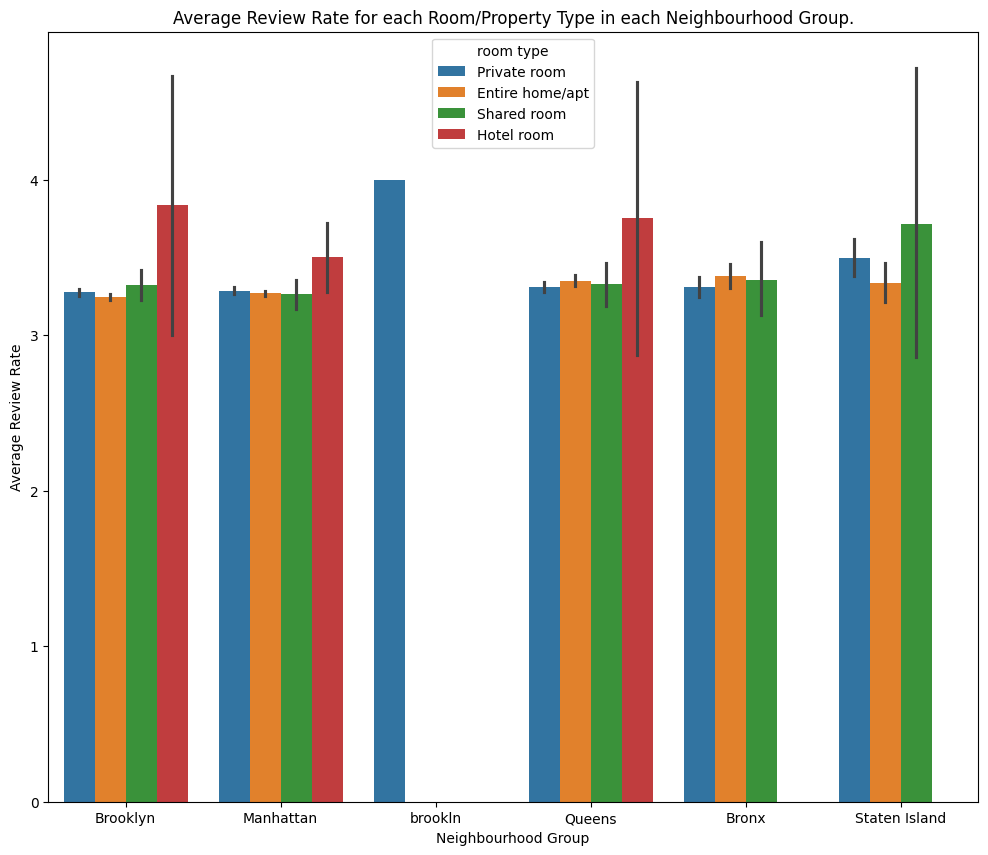

In [37]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y ='review rate number', hue ='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

In [42]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284107
unconfirmed,3.273325


from matplotlib import pyplot as plt
review['review rate number'].plot(kind='hist', bins=20, title='review rate number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
review['review rate number'].plot(kind='line', figsize=(8, 4), title='review rate number')
plt.gca().spines[['top', 'right']].set_visible(False)

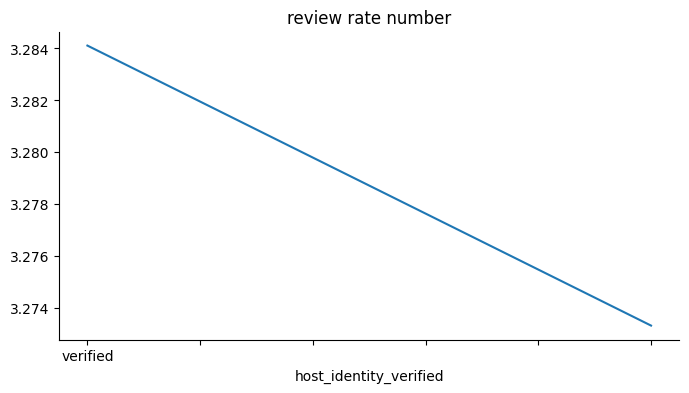

In [43]:
from matplotlib import pyplot as plt
review['review rate number'].plot(kind='line', figsize=(8, 4), title='review rate number')
plt.gca().spines[['top', 'right']].set_visible(False)

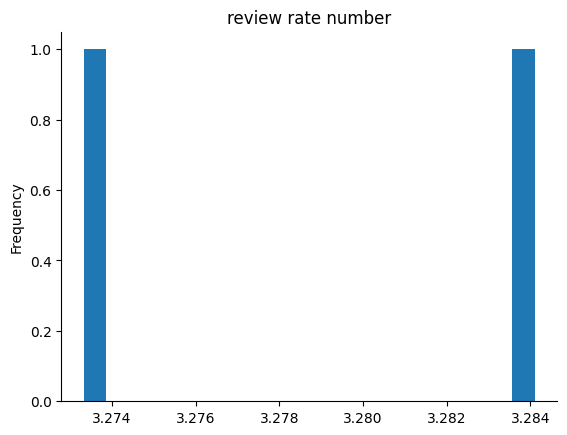

In [44]:
from matplotlib import pyplot as plt
review['review rate number'].plot(kind='hist', bins=20, title='review rate number')
plt.gca().spines[['top', 'right',]].set_visible(False)

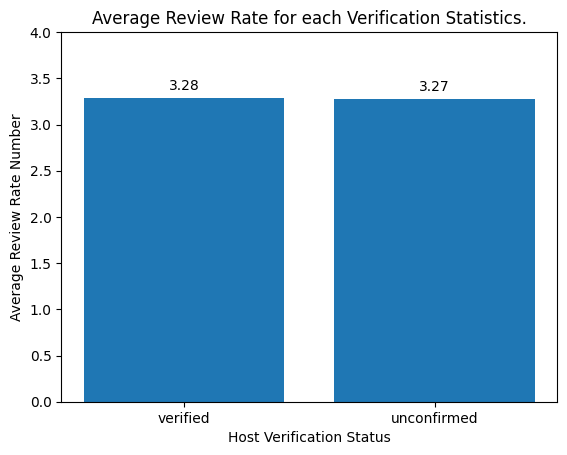

In [45]:
review_bar = plt.bar(review. index, review.loc[:, "review rate number"]);

plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);

plt.ylim([0,4]);

plt.xlabel("Host Verification Status");

plt.ylabel('Average Review Rate Number');

plt.title('Average Review Rate for each Verification Statistics.');

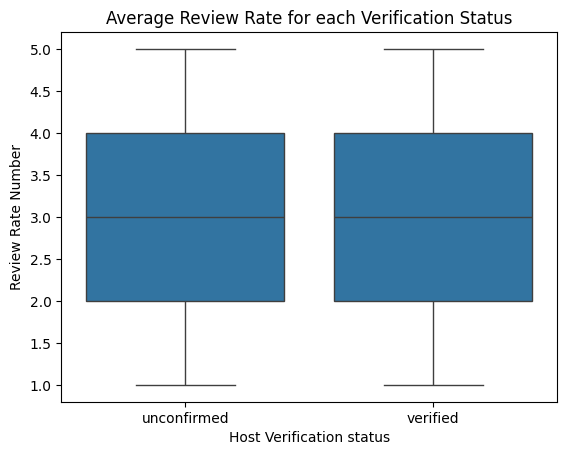

In [46]:
base_color = sns.color_palette()[0]

sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);

plt.xlabel('Host Verification status');

plt.ylabel('Review Rate Number');

plt.title('Average Review Rate for each Verification Status');

In [48]:
ARRN = df.groupby(['neighbourhood group', 'room type']) ['review rate number'].mean().to_frame()

ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274728
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

from matplotlib import pyplot as plt
ARRN['review rate number'].plot(kind='hist', bins=20, title='review rate number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ARRN['review rate number'].plot(kind='line', figsize=(8, 4), title='review rate number')
plt.gca().spines[['top', 'right']].set_visible(False)

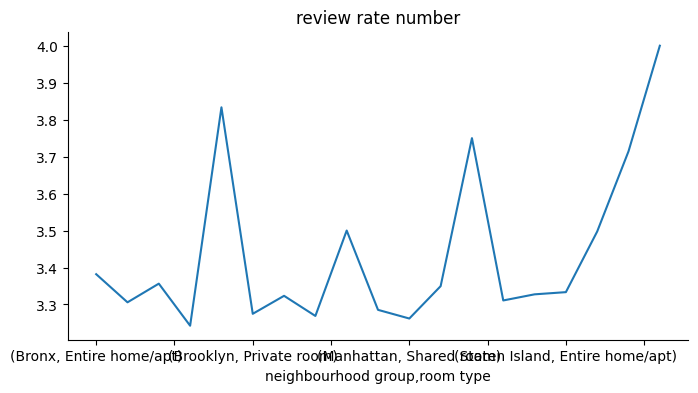

In [49]:
from matplotlib import pyplot as plt
ARRN['review rate number'].plot(kind='line', figsize=(8, 4), title='review rate number')
plt.gca().spines[['top', 'right']].set_visible(False)

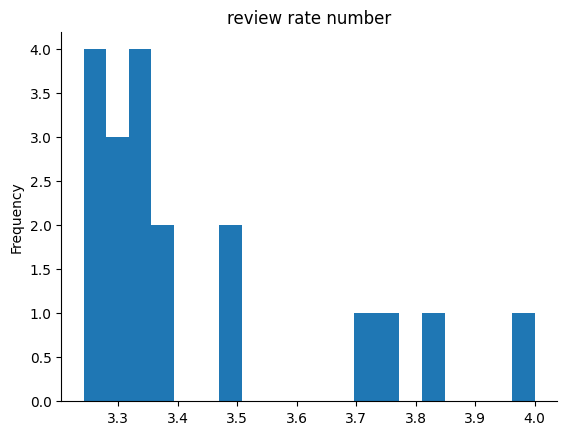

In [50]:
from matplotlib import pyplot as plt
ARRN['review rate number'].plot(kind='hist', bins=20, title='review rate number')
plt.gca().spines[['top', 'right',]].set_visible(False)

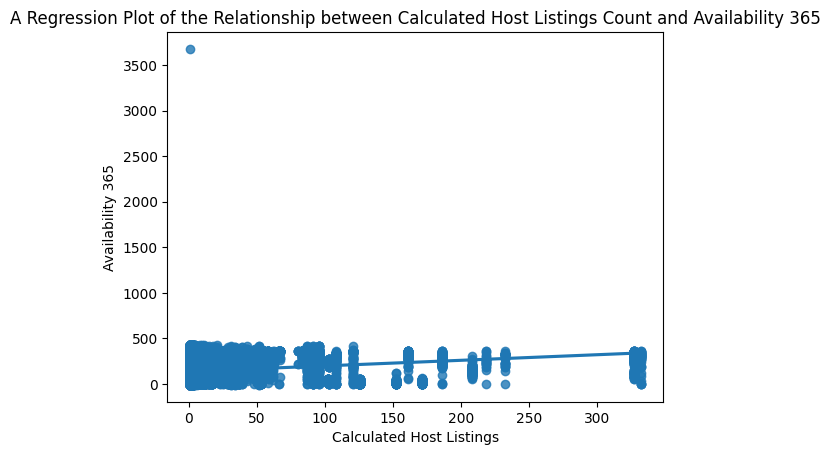

In [51]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [54]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13536321456941783)